In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [4]:
mongoConn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = mongoConn.get_database('lagou')  # 连接到Lianjia数据库

positions = db.get_collection('jobs') # 连接到集合zufang
mon_data = positions.find()  # 查询这个集合下的所有记录,数据以json格式返回

In [5]:
data = json_normalize([comment for comment in mon_data])
data.head()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,_id,positionId,positionName,firstType,secondType,thirdType,skillLables,salary,city,workYear,education,positionAdvantage,companyFullName,companyShortName,companySize,industryField,financeStage
0,5e92cb99dadc61a2b8cb8546,3106885,Java开发工程师,开发|测试|运维类,后端开发,其他后端开发,[Java],10K-20K,上海,3-5年,本科,"工作氛围佳,福利好,发展前景好,国外旅游",上海沃行信息技术有限公司,WallTech,50-150人,"移动互联网,数据服务",天使轮
1,5e92cb99dadc61a2b8cb8547,6826331,Java开发工程师,开发|测试|运维类,后端开发,Java,"[中间件, Java, ERP, 系统架构]",27k-54k,北京,3-5年,本科,业务快速发展,北京字节跳动科技有限公司,字节跳动,2000人以上,文娱丨内容,C轮
2,5e92cb99dadc61a2b8cb8548,6357642,高级java开发工程师,开发|测试|运维类,后端开发,Java,"[分布式, Java]",20k-35k,上海,5-10年,本科,团队管理架构搭建氛围nice,上海众言网络科技有限公司,问卷网@爱调研,150-500人,移动互联网,C轮
3,5e92cb99dadc61a2b8cb8549,6744682,java开发工程师,开发|测试|运维类,后端开发,Java,"[后端, 服务器端]",16k-28k,深圳,3-5年,本科,团队氛围好，有大牛，激励期权，节日福利,深圳开思时代科技有限公司,开思时代,500-2000人,"移动互联网,电商",C轮
4,5e92cb99dadc61a2b8cb854a,5838485,java开发工程师,开发|测试|运维类,后端开发,Java,"[Java, 架构师]",15k-30k,深圳,3-5年,本科,AI平台、大牛多、发展快,深圳市华付信息技术有限公司,华付信息,150-500人,"移动互联网,硬件",C轮


In [6]:
data.groupby(['city']).count()

,_id,positionId,positionName,firstType,secondType,thirdType,skillLables,salary,workYear,education,positionAdvantage,companyFullName,companyShortName,companySize,industryField,financeStage
city,,,,,,,,,,,,,,,,
上海,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285
上饶,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
东莞,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
中卫,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
中山,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
青岛,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
马鞍山,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
黄山,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
data.groupby(['city']).count().sort_values('_id',ascending=False)[:10]

,_id,positionId,positionName,firstType,secondType,thirdType,skillLables,salary,workYear,education,positionAdvantage,companyFullName,companyShortName,companySize,industryField,financeStage
city,,,,,,,,,,,,,,,,
北京,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4274,4275,4275
深圳,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395
上海,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285
广州,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009
杭州,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
成都,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802
武汉,486,486,486,486,486,486,486,486,486,486,486,486,486,486,486,486
南京,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233
西安,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


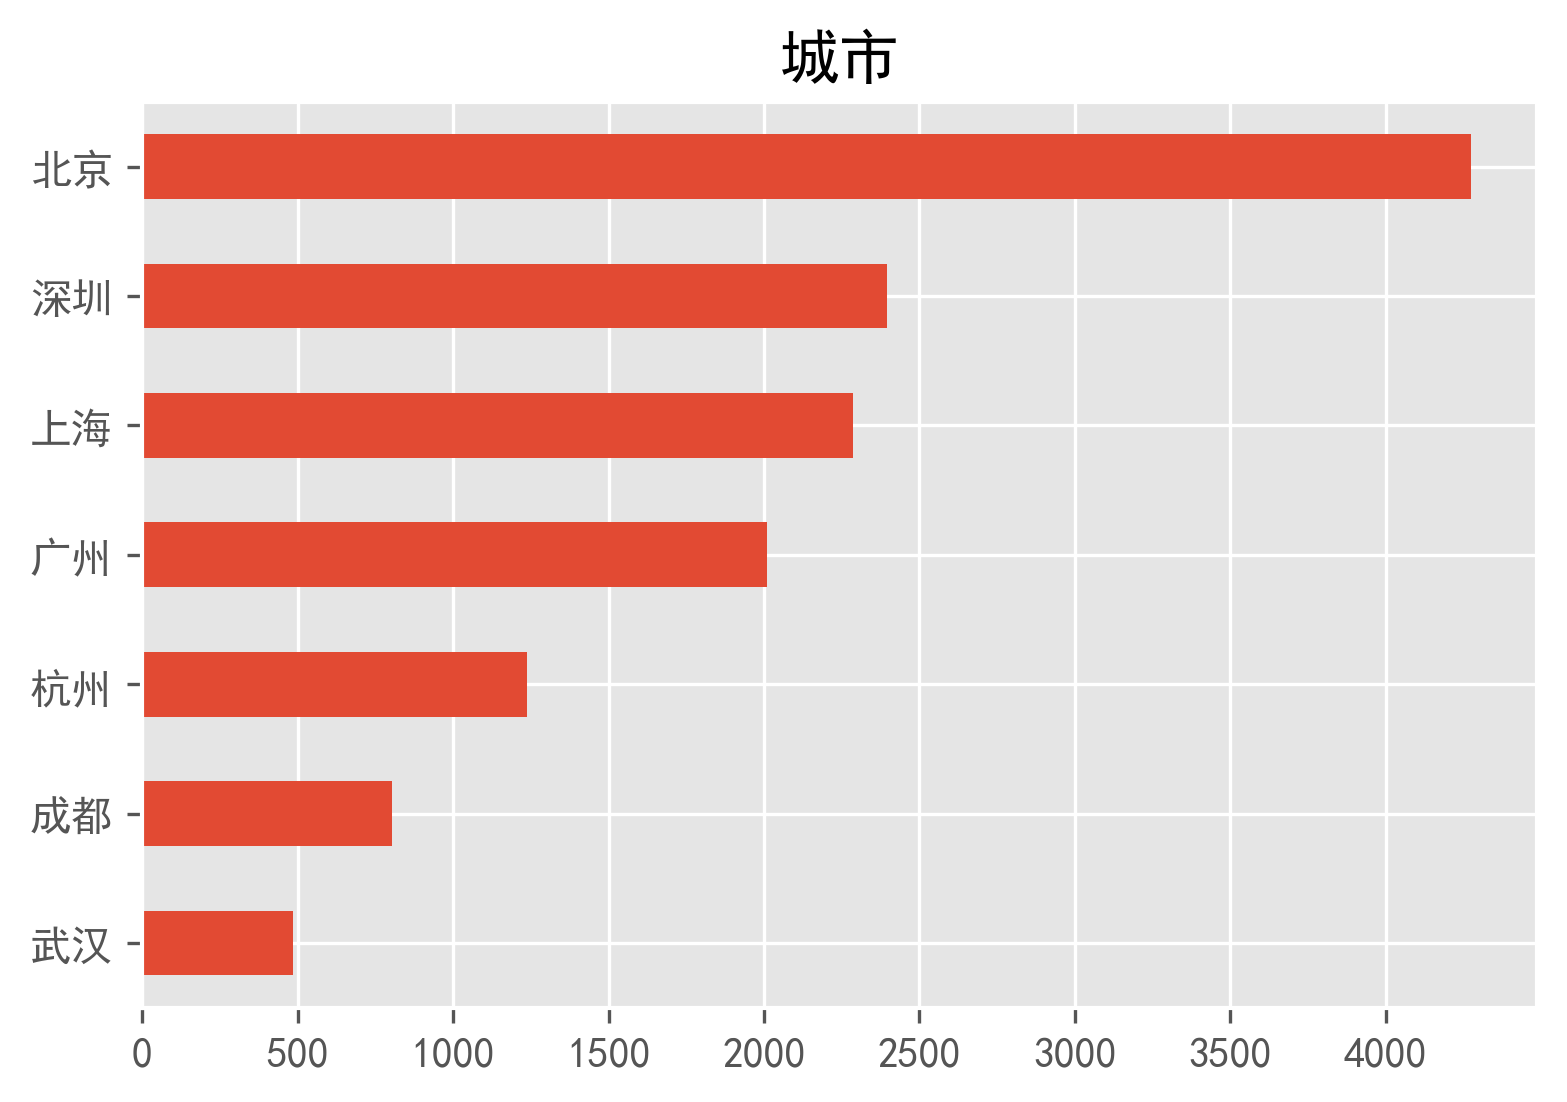

In [8]:
fig = plt.figure(dpi=300)

#data['city'].value_counts(ascending=False)[:7].plot.barh(title='城市')
data['city'].value_counts(ascending=True)[-7:].plot.barh(title='城市')

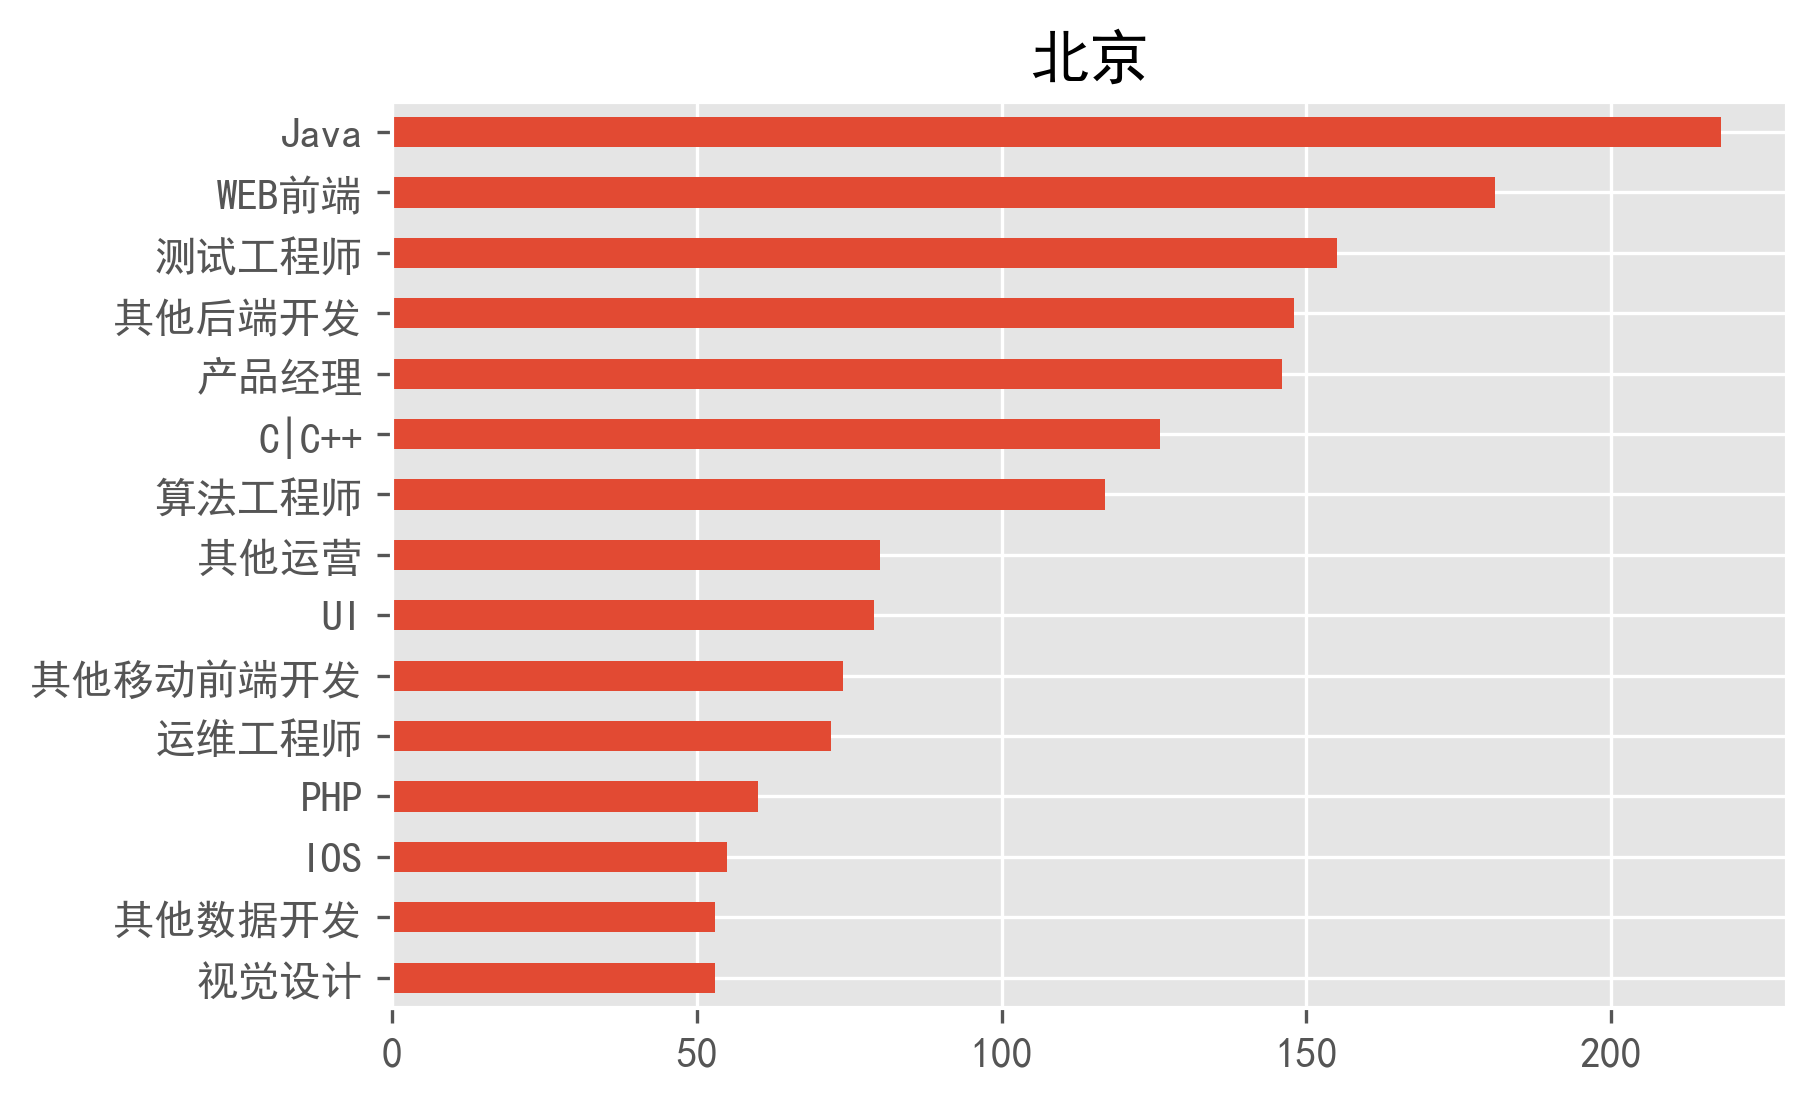

In [9]:
fig = plt.figure(dpi=300)
#data[data['city']=='北京']['thirdType'].value_counts(ascending=False)[:15].plot.barh(title='北京')
data[data['city']=='北京']['thirdType'].value_counts(ascending=True)[-15:].plot.barh(title='北京')

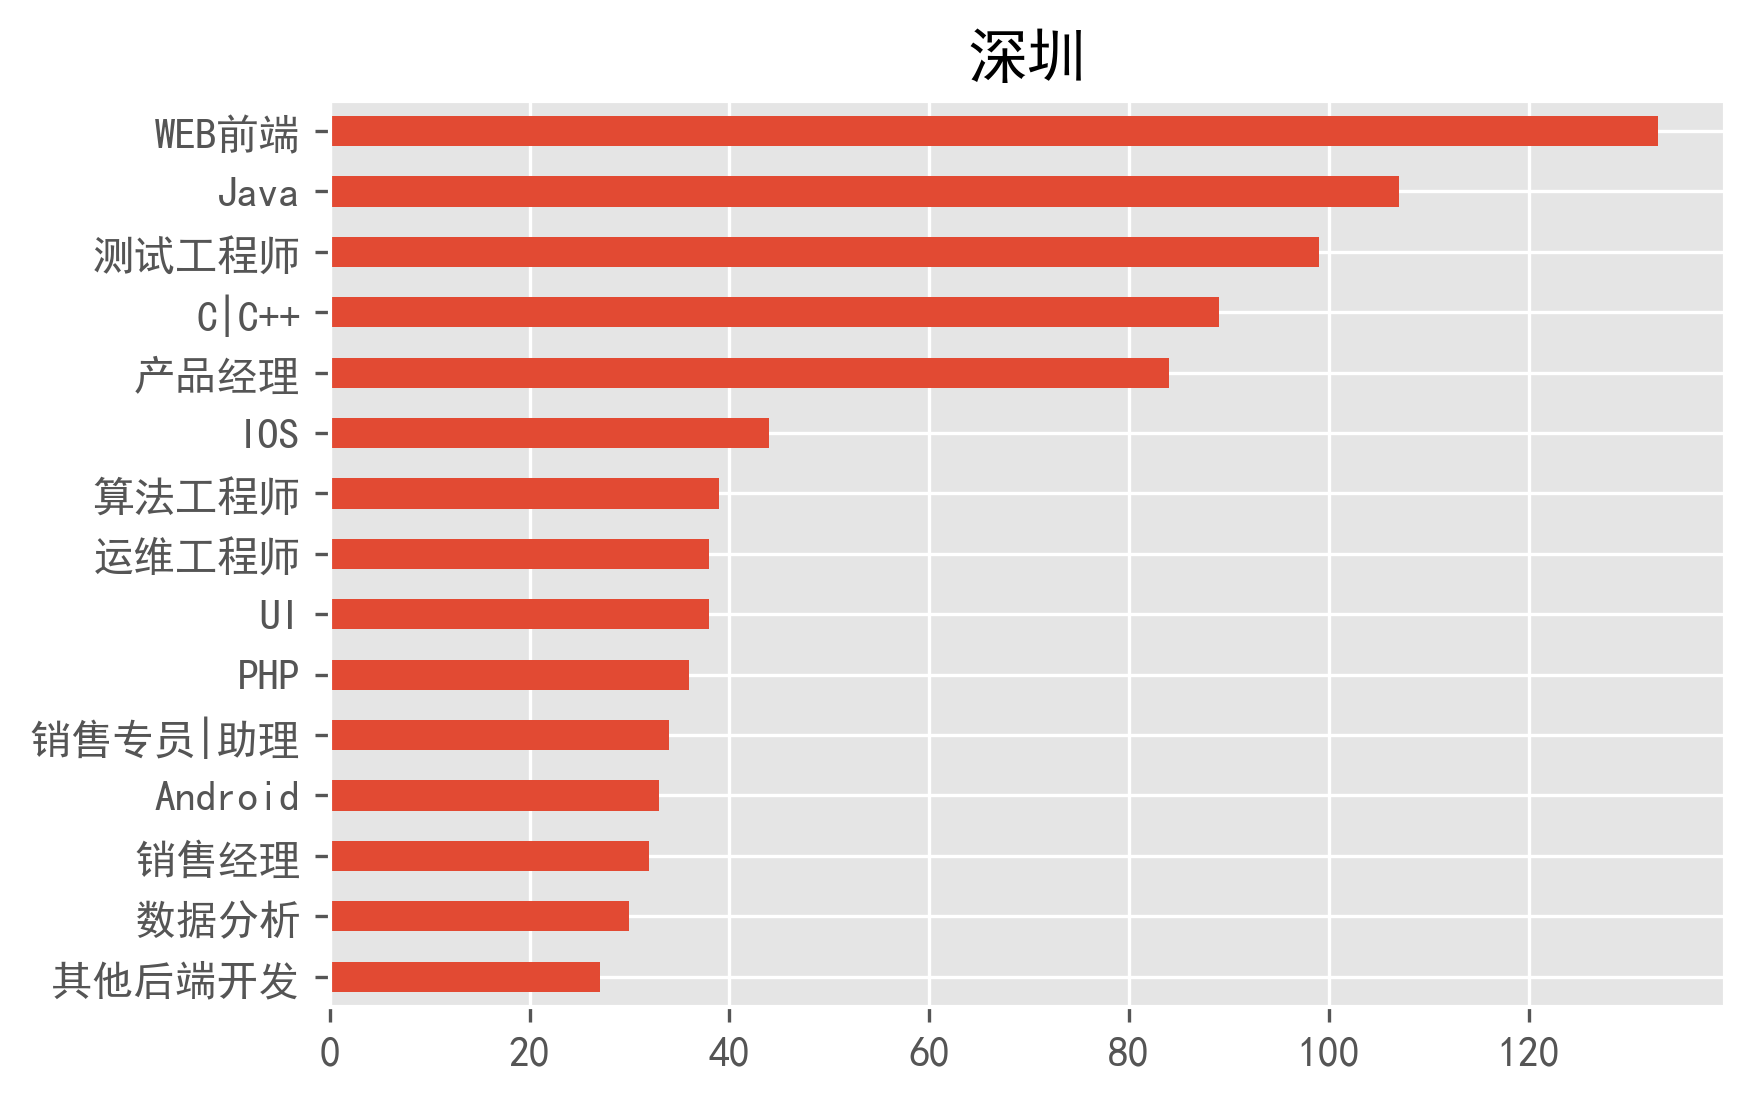

In [10]:
fig = plt.figure(dpi=300)
#data[data['city']=='深圳']['thirdType'].value_counts(ascending=False)[:15].plot.barh(title='深圳')
data[data['city']=='深圳']['thirdType'].value_counts(ascending=True)[-15:].plot.barh(title='深圳')

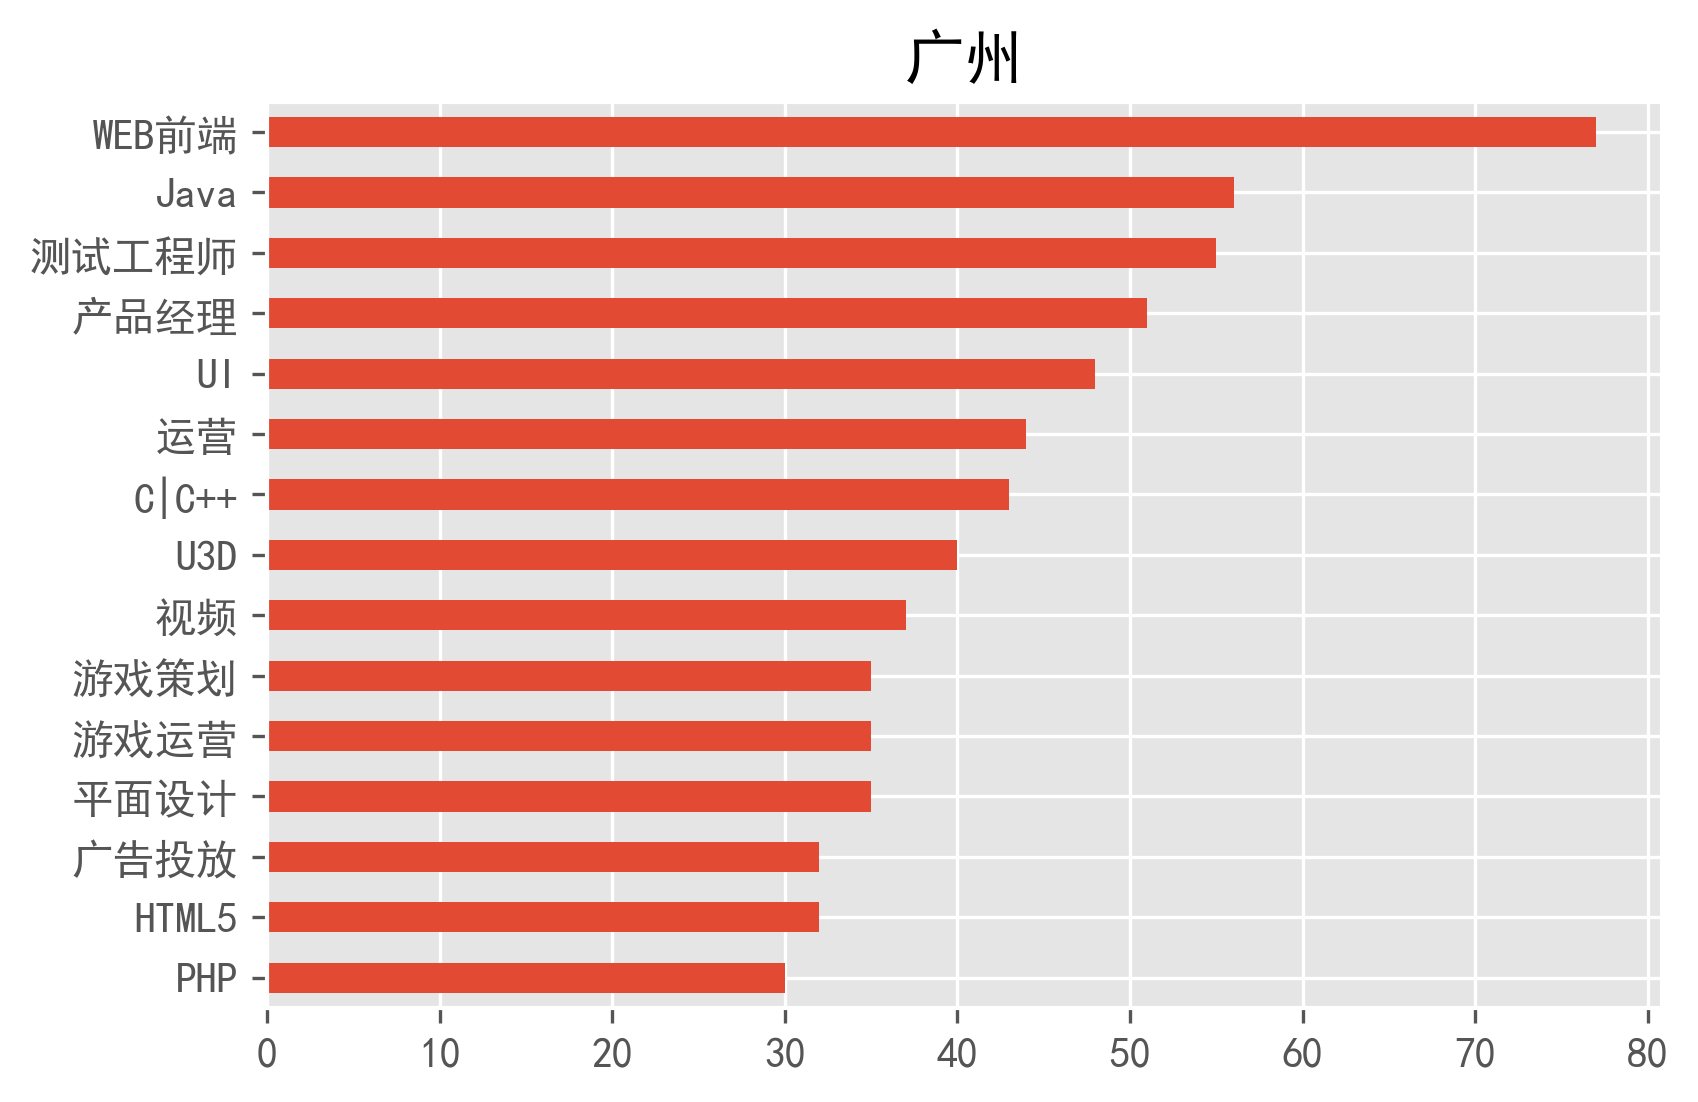

In [11]:
fig = plt.figure(dpi=300)
#data[data['city']=='广州']['thirdType'].value_counts(ascending=False)[:15].plot.barh(title='广州')
data[data['city']=='广州']['thirdType'].value_counts(ascending=True)[-15:].plot.barh(title='广州')

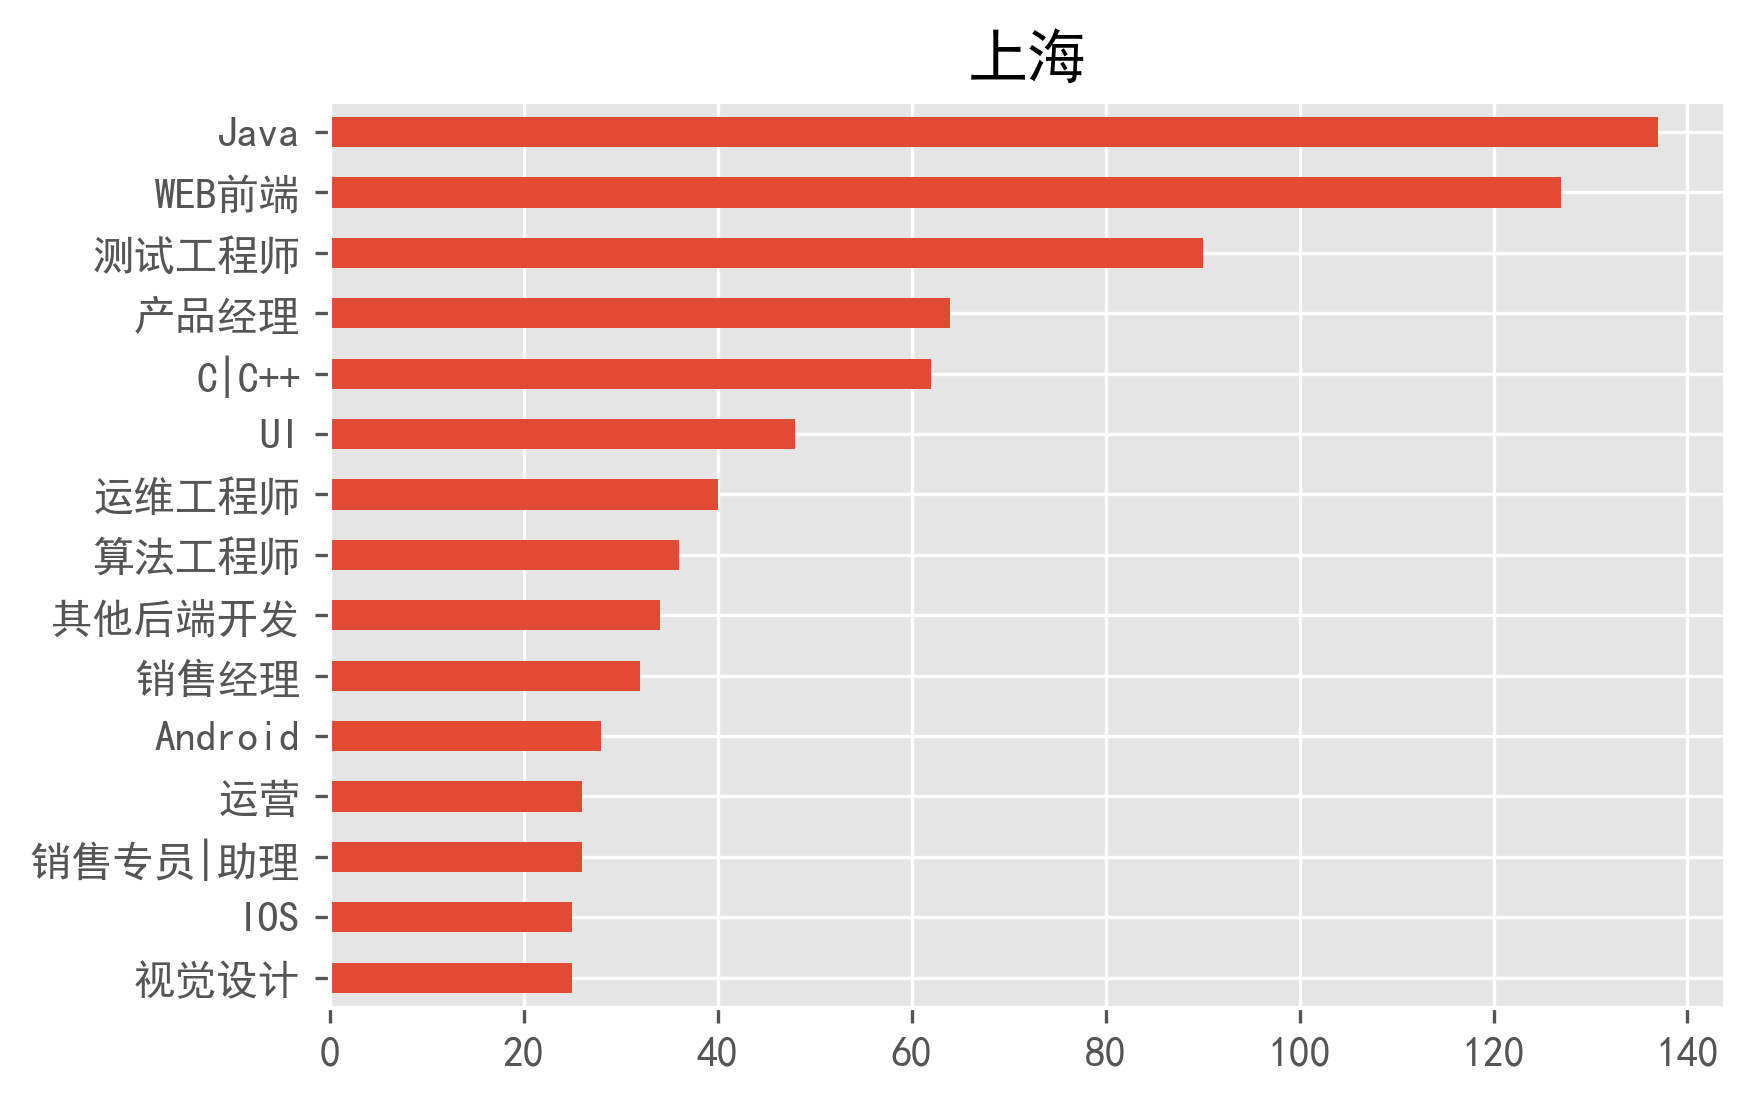

In [12]:
fig = plt.figure(dpi=300)
#data[data['city']=='上海']['thirdType'].value_counts(ascending=False)[:15].plot.barh(title='上海')
data[data['city']=='上海']['thirdType'].value_counts(ascending=True)[-15:].plot.barh(title='上海')

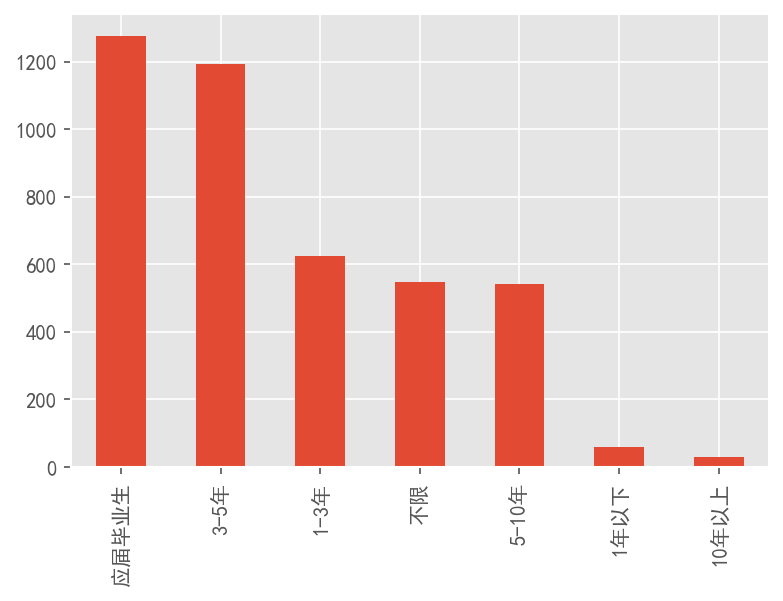

In [13]:
fig = plt.figure(dpi=150)
data[data['city']=='北京']['workYear'].value_counts(ascending=False).plot.bar()

In [14]:
data[data['city']=='北京'].groupby(['thirdType', 'workYear']).count()


_id  positionId  positionName  firstType  secondType  \
thirdType workYear                                                         
Android   1-3年        5           5             5          5           5   
          3-5年       10          10            10         10          10   
          5-10年       5           5             5          5           5   
          不限          3           3             3          3           3   
          应届毕业生      16          16            16         16          16   
...                 ...         ...           ...        ...         ...   
项目经理      不限          1           1             1          1           1   
          应届毕业生       2           2             2          2           2   
风控        1-3年        1           1             1          1           1   
驱动开发      1-3年        1           1             1          1           1   
          3-5年        2           2             2          2           2   

                    skillLables  salary  city  education  positionAdvantage  \
thirdType workYear                                                            
Android   1-3年                5       5     5          5                  5   
          3-5年               10      10    10         10                 10   
          5-10年               5       5     5          5                  5   
          不限                  3       3     3          3                  3   
          应届毕业生              16      16    16         16                 16   
...                         ...     ...   ...        ...                ...   
项目经理      不限                  1       1     1          1                  1   
          应届毕业生               2       2     2          2                  2   
风控        1-3年                1       1     1          1                  1   
驱动开发      1-3年                1       1     1          1                  1   
          3-5年                2       2     2          2                  2   

                    companyFullName  companyShortName  companySize  \
thirdType workYear                                                   
Android   1-3年                    5                 5            5   
          3-5年                   10                10           10   
          5-10年                   5                 5            5   
          不限                      3                 3            3   
          应届毕业生                  16                16           16   
...                             ...               ...          ...   
项目经理      不限                      1                 1            1   
          应届毕业生                   2                 2            2   
风控        1-3年                    1                 1            1   
驱动开发      1-3年                    1                 1            1   
          3-5年                    2                 2            2   

                    industryField  financeStage  
thirdType workYear                               
Android   1-3年                  5             5  
          3-5年                 10            10  
          5-10年                 5             5  
          不限                    3             3  
          应届毕业生                16            16  
...                           ...           ...  
项目经理      不限                    1             1  
          应届毕业生                 2             2  
风控        1-3年                  1             1  
驱动开发      1-3年                  1             1  
          3-5年                  2             2  

[1052 rows x 15 columns]

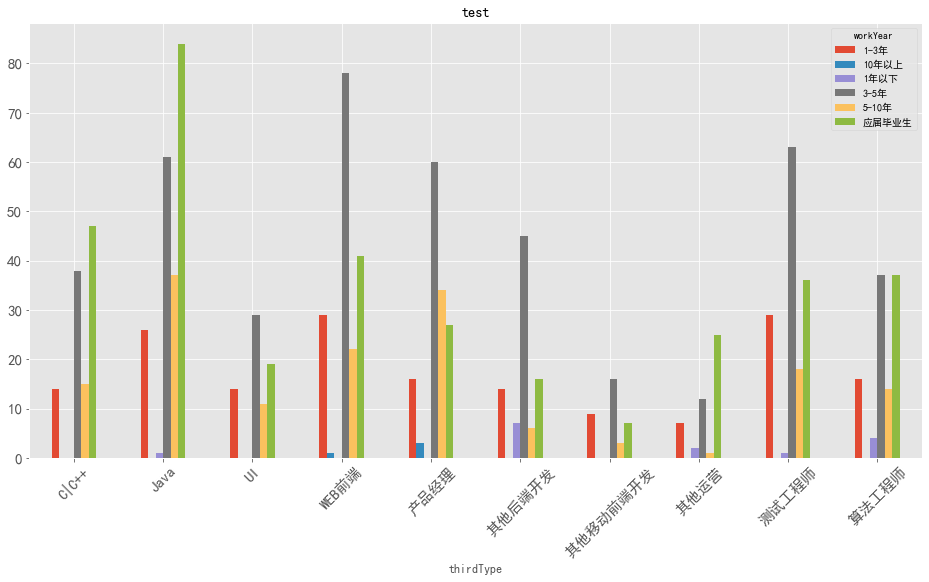

In [15]:
_type = list(data[data['city']=='北京'].groupby(['thirdType']).count().sort_values('_id',ascending=False)[10:].index)
data1=data[~data['thirdType'].isin(_type)]

pos_workY_data = data1[data1['city']=='北京'].groupby(['thirdType', 'workYear']).count().reset_index().pivot('thirdType','workYear','_id')
pos_workY_data.drop(['不限'], axis=1).plot.bar(title='test', figsize=(16, 8), rot=45, fontsize=15)

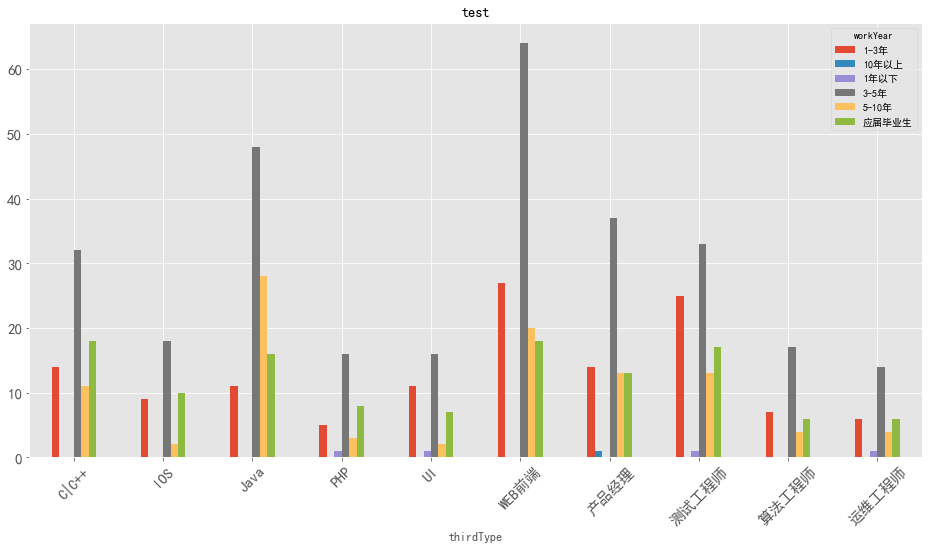

In [16]:
_type = list(data[data['city']=='深圳'].groupby(['thirdType']).count().sort_values('_id',ascending=False)[10:].index)
data1=data[~data['thirdType'].isin(_type)]

pos_workY_data = data1[data1['city']=='深圳'].groupby(['thirdType', 'workYear']).count().reset_index().pivot('thirdType','workYear','_id')
pos_workY_data.drop(['不限'], axis=1).plot.bar(title='test', figsize=(16, 8), rot=45, fontsize=15)

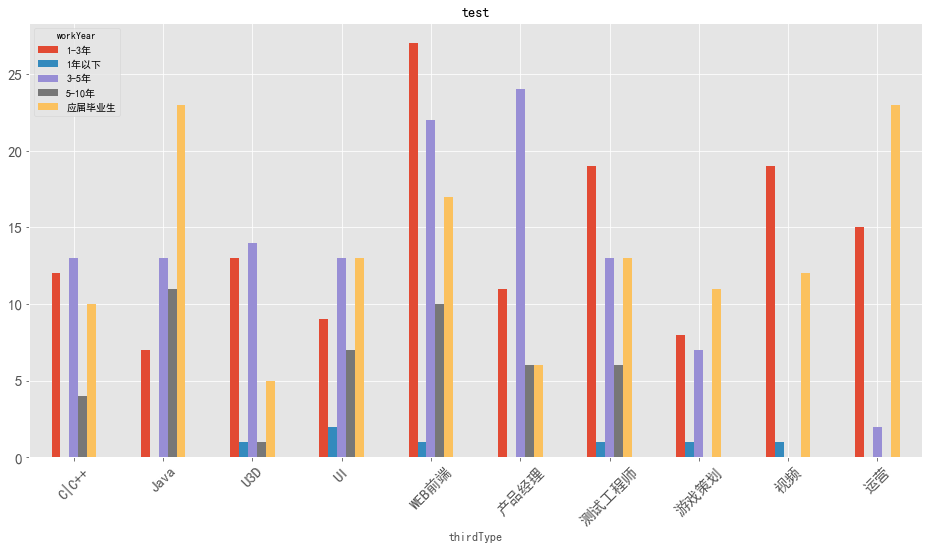

In [17]:
_type = list(data[data['city']=='广州'].groupby(['thirdType']).count().sort_values('_id',ascending=False)[10:].index)
data1=data[~data['thirdType'].isin(_type)]

pos_workY_data = data1[data1['city']=='广州'].groupby(['thirdType', 'workYear']).count().reset_index().pivot('thirdType','workYear','_id')
pos_workY_data.drop(['不限'], axis=1).plot.bar(title='test', figsize=(16, 8), rot=45, fontsize=15)

In [18]:
def avg_salary(salary):
    salary = salary.lower().replace('k', '').replace('以上', '')
    salary_lu = salary.split('-')
    lower = int(salary_lu[0])
    if len(salary_lu) == 1:
        return lower
    upper = int(salary_lu[1])
    
    return (lower + upper) / 2

data['avg_salary'] = data.apply(lambda x: avg_salary(x['salary']), axis=1)

data.head()

,_id,positionId,positionName,firstType,secondType,thirdType,skillLables,salary,city,workYear,education,positionAdvantage,companyFullName,companyShortName,companySize,industryField,financeStage,avg_salary
0,5e92cb99dadc61a2b8cb8546,3106885,Java开发工程师,开发|测试|运维类,后端开发,其他后端开发,[Java],10K-20K,上海,3-5年,本科,"工作氛围佳,福利好,发展前景好,国外旅游",上海沃行信息技术有限公司,WallTech,50-150人,"移动互联网,数据服务",天使轮,15.0
1,5e92cb99dadc61a2b8cb8547,6826331,Java开发工程师,开发|测试|运维类,后端开发,Java,"[中间件, Java, ERP, 系统架构]",27k-54k,北京,3-5年,本科,业务快速发展,北京字节跳动科技有限公司,字节跳动,2000人以上,文娱丨内容,C轮,40.5
2,5e92cb99dadc61a2b8cb8548,6357642,高级java开发工程师,开发|测试|运维类,后端开发,Java,"[分布式, Java]",20k-35k,上海,5-10年,本科,团队管理架构搭建氛围nice,上海众言网络科技有限公司,问卷网@爱调研,150-500人,移动互联网,C轮,27.5
3,5e92cb99dadc61a2b8cb8549,6744682,java开发工程师,开发|测试|运维类,后端开发,Java,"[后端, 服务器端]",16k-28k,深圳,3-5年,本科,团队氛围好，有大牛，激励期权，节日福利,深圳开思时代科技有限公司,开思时代,500-2000人,"移动互联网,电商",C轮,22.0
4,5e92cb99dadc61a2b8cb854a,5838485,java开发工程师,开发|测试|运维类,后端开发,Java,"[Java, 架构师]",15k-30k,深圳,3-5年,本科,AI平台、大牛多、发展快,深圳市华付信息技术有限公司,华付信息,150-500人,"移动互联网,硬件",C轮,22.5


In [19]:
data[data['avg_salary'] >= 100	][['positionName', 'positionId', 'salary', 'workYear', 'companyShortName']]

,positionName,positionId,salary,workYear,companyShortName
1766,CFO,6799515,100k-200k,10年以上,当当网
1779,CFO,6437542,90k-120k,不限,深圳星标
2706,HRVP,6826114,100k-150k,10年以上,友聚四海
2847,CFO,7002512,100k-200k,5-10年,爱化（上海）企业管理咨询有限公司
2886,财务副总,6996613,90k-150k,10年以上,慧择信息集团
3458,销售经理,6241429,100k-200k,3-5年,中国人民人寿保险股份有限公司北京市分公司顺义区营销服务部
4436,插画实习生 (MJ000914),6086757,200k-250k,应届毕业生,一起教育科技
4490,运营专员-金融方向（途虎21届校招）,6957991,100k-200k,应届毕业生,途虎养车网
6433,财务副总,6945387,100k-200k,10年以上,慧择信息集团
6805,COO,6355653,80k-150k,10年以上,广东三维家信息科技有限公司


In [20]:
# # 不同职位的学历分布
# pos_edu_data = data1[data1['city']=='北京'].groupby(['thirdType', 'education']).count().reset_index().pivot('thirdType','education','_id')
# pos_edu_data.drop(['不限'], axis=1).plot.bar(title='test', figsize=(16, 8), rot=45, fontsize=15)
data1.count()

_id                  4854
positionId           4854
positionName         4854
firstType            4854
secondType           4854
thirdType            4854
skillLables          4854
salary               4854
city                 4854
workYear             4854
education            4854
positionAdvantage    4854
companyFullName      4854
companyShortName     4854
companySize          4854
industryField        4854
financeStage         4854
dtype: int64

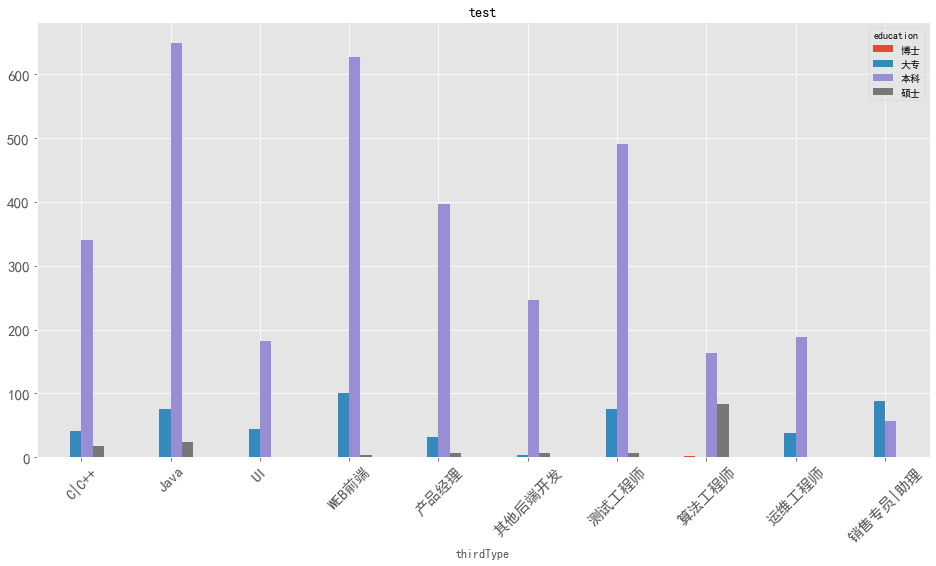

In [21]:
_type = list(data.groupby(['thirdType']).count().sort_values('_id',ascending=False)[10:].index)
data1=data[~data['thirdType'].isin(_type)]

# 不同职位的学历分布
pos_edu_data = data1.groupby(['thirdType', 'education']).count().reset_index().pivot('thirdType','education','_id')
pos_edu_data.drop(['不限'], axis=1).plot.bar(title='test', figsize=(16, 8), rot=45, fontsize=15)

In [28]:
from pyecharts import Pie
name = data.groupby(['education']).count().index
values = data.groupby(['education']).count().values
pie = Pie("education")
pie.add(
    "",
    name,
    values,
    is_label_show=True,
    is_more_utils=True
)



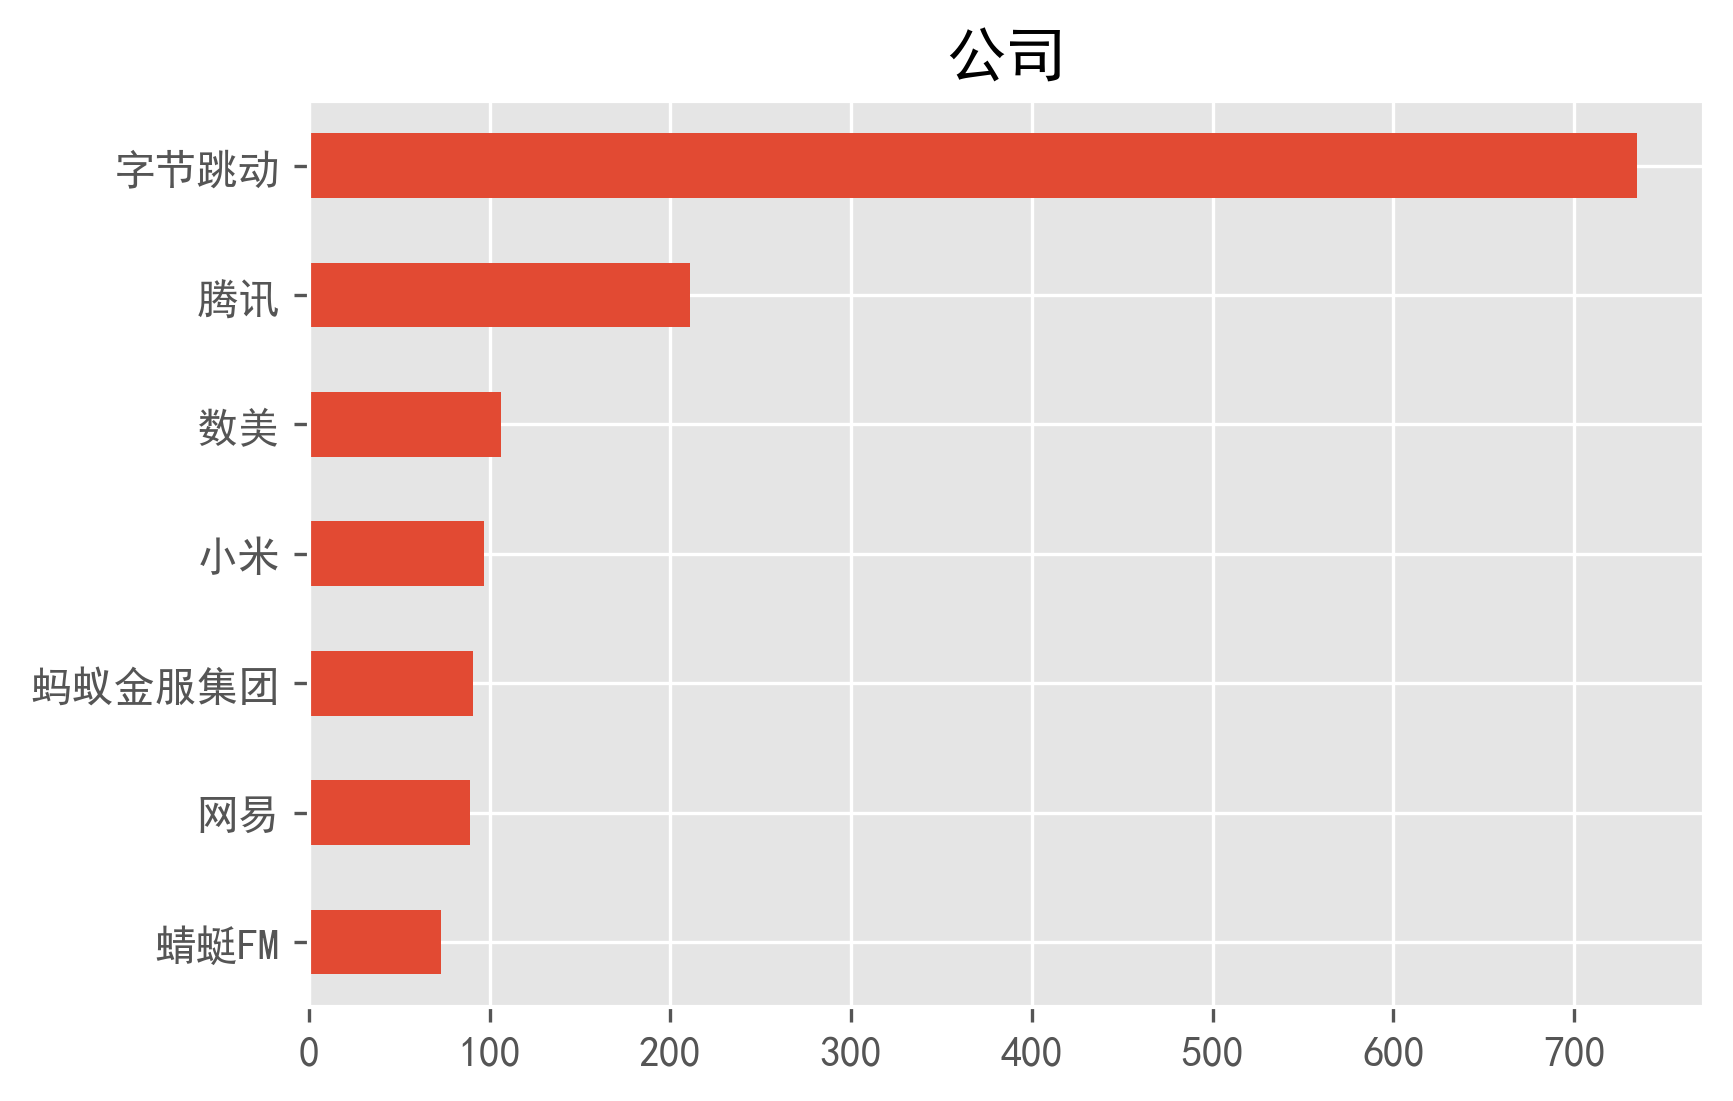

In [20]:
fig = plt.figure(dpi=300)
#data['companyShortName'].value_counts(ascending=False)[:7].plot.barh(title='公司')
data['companyShortName'].value_counts(ascending=True)[-7:].plot.barh(title='公司')

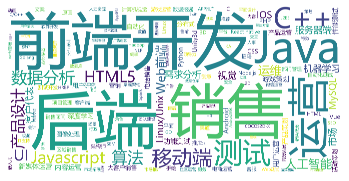

In [22]:
from collections import Counter
import wordcloud 
from PIL import Image # 图像处理库
tag = []
for each in data['skillLables']:
    if each != []:
        for row in each:
            tag.append(row)
word_counts = Counter(tag)
#mask = np.array(Image.open('background.jpg'))
wc = wordcloud.WordCloud(
    background_color='white', # 设置背景颜色
    font_path='/System/Library/Fonts/msyh.ttc', # 设置字体格式
    # mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=75 , # 字体最大值
    scale=32  # 调整图片清晰度，值越大越清楚
)

wc.generate_from_frequencies(word_counts) # 从字典生成词云
#image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
#wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
wc.to_file("C:\\Users\\Administrator\\Desktop\\temp.jpg") # 将图片输出为文件
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像